In [1]:
import os
import time
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

from joblib import dump

import model_prep_and_evals as mpe 

In [3]:
# **************************************************************
root = '/home/jovyan/msai4earth-esa/iceplant_detection/models/model_2k/twok_dataset/dataset_2500/initial_dataset/'
train_name = 'train_2500.csv'
test_name = 'test_2500.csv'

label_name = 'iceplant'

# ------------------------------
# IMPORT TRAIN DATA
X_train = pd.read_csv(os.path.join(root, train_name))
y_train = pd.read_csv(os.path.join(root, train_name)).loc[:,label_name] 
y_train = y_train.to_numpy()

# ------------------------------
# IMPORT TEST DATA
X_test = pd.read_csv(os.path.join(root, test_name))
y_test = pd.read_csv(os.path.join(root, test_name)).loc[:,label_name] 
y_test = y_test.to_numpy()

# ------------------------------
box_sides = [3,5,7,9,11,13,15,17,19,21,23,25,27]  

In [ ]:
# #********** checkpoints ************
# X_train
# print(X_test.columns == X_train.columns)
# print(X_train.columns)
# mpe.test_train_proportions(y_train, y_test)

In [6]:
results = []

# ---------------------------------------------------
# calculate accuracies for spectral bands and spectral + dates

# feats is only vector with the labels for the different models
feats = ['spectral','spectral+date','spectral+ndvi','spectral+ndvi+date']

bands = ['r','g','b','nir','ndvi']

for cols in [['r','g','b','nir'], 
             ['r','g','b','nir','month', 'day_in_year'], 
             bands, 
             bands + ['month', 'day_in_year']]:

    X_train_sub = X_train[cols].to_numpy()
    X_test_sub = X_test[cols].to_numpy()    

    rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rfc.fit(X_train_sub, y_train)
    
    preds = rfc.predict(X_test_sub)
    
    results.append(mpe.accuracy_info_df(y_test, preds))

# ---------------------------------------------------
# calculate accuracies for average + entropy textures
feats = feats + ['avg_ent_'+str(x) for x in box_sides]

for box_s in box_sides:
    
    window_features = [band + x + str(box_s) for band in bands for x in ['_avg', '_entr']]
    cols =  bands + window_features + ['month', 'day_in_year']

    X_train_sub = X_train[cols].to_numpy()
    X_test_sub = X_test[cols].to_numpy()    

    rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rfc.fit(X_train_sub, y_train)
    
    preds = rfc.predict(X_test_sub)
    
    results.append(mpe.accuracy_info_df(y_test, preds))

# ---------------------------------------------------
# calculate accuracies for glcm correlation + contrast features
feats = feats + ['glcm_'+str(x) for x in box_sides]

for box_s in box_sides:
    
    window_features = [band + x + str(box_s) for band in ['r','g','b','nir'] for x in ['_contN_', '_corrN_', '_contE_','_corrE_']]
    cols =  bands + window_features + ['month', 'day_in_year']

    X_train_sub = X_train[cols].to_numpy()
    X_test_sub = X_test[cols].to_numpy()    

    rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rfc.fit(X_train_sub, y_train)
    
    preds = rfc.predict(X_test_sub)
    
    results.append(mpe.accuracy_info_df(y_test, preds))
    
# ---------------------------------------------------
# calculate accuracies for entropy textures
feats = feats + ['entr_'+str(x) for x in box_sides]

for box_s in box_sides:
    
    window_features = [band + '_entr' + str(box_s) for band in bands]
    cols =  bands + window_features + ['month', 'day_in_year']

    X_train_sub = X_train[cols].to_numpy()
    X_test_sub = X_test[cols].to_numpy()    

    rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rfc.fit(X_train_sub, y_train)
    
    preds = rfc.predict(X_test_sub)
    
    results.append(mpe.accuracy_info_df(y_test, preds))

    
# ---------------------------------------------------
# calculate accuracies for entropy textures
feats = feats + ['avg_'+str(x) for x in box_sides]

for box_s in box_sides:
    
    window_features = [band + '_avg' + str(box_s) for band in bands]
    cols =  bands + window_features + ['month', 'day_in_year']

    X_train_sub = X_train[cols].to_numpy()
    X_test_sub = X_test[cols].to_numpy()    

    rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rfc.fit(X_train_sub, y_train)
    
    preds = rfc.predict(X_test_sub)
    
    results.append(mpe.accuracy_info_df(y_test, preds))


In [7]:
R = pd.concat(results).reset_index(drop=True)
R['features'] = feats
R

,TN,TP,FN,FP,acc,prod_acc_P,user_acc_P,prod_acc_N,user_acc_N,features
0,343,271,59,77,81.87,82.12,77.87,81.67,85.32,spectral
1,360,294,36,60,87.20,89.09,83.05,85.71,90.91,spectral+date
2,343,274,56,77,82.27,83.03,78.06,81.67,85.96,spectral+ndvi
3,361,288,42,59,86.53,87.27,83.00,85.95,89.58,spectral+ndvi+date
4,376,287,43,44,88.40,86.97,86.71,89.52,89.74,avg_ent_3
5,386,290,40,34,90.13,87.88,89.51,91.90,90.61,avg_ent_5
6,390,286,44,30,90.13,86.67,90.51,92.86,89.86,avg_ent_7
7,390,292,38,30,90.93,88.48,90.68,92.86,91.12,avg_ent_9
8,387,295,35,33,90.93,89.39,89.94,92.14,91.71,avg_ent_11
9,390,301,29,30,92.13,91.21,90.94,92.86,93.08,avg_ent_13


In [9]:
R.to_csv('accuracies_feature_experiments.csv',index=False)

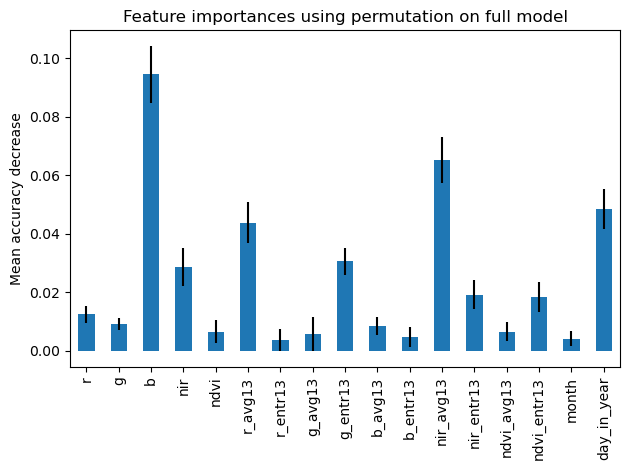

In [15]:
box_s = 13
window_features = [band + x + str(box_s) for band in bands for x in ['_avg', '_entr']]
cols =  bands + window_features + ['month', 'day_in_year']

X_train_sub = X_train[cols].to_numpy()
X_test_sub = X_test[cols].to_numpy()    

rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train_sub, y_train)

preds = rfc.predict(X_test_sub)

result = permutation_importance(
    rfc, 
    X_test_sub,
    y_test,
    n_repeats=10, 
    random_state=42, 
    n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [16]:
mpe.accuracy_info_df(y_test, preds)

,TN,TP,FN,FP,acc,prod_acc_P,user_acc_P,prod_acc_N,user_acc_N
0,390,301,29,30,92.13,91.21,90.94,92.86,93.08
